##  Week4 복습과제

Week3에 대한 복습과제입니다.  
데이터셋(train.csv, mushrooms.csv)을 다운 받아주세요!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 'train.csv'으로 train_df를 생성하세요.

In [2]:
train_df = pd.read_csv('train.csv')

#### 데이터 보정을 위해 다음 코드를 실행시켜 주세요.

In [3]:
# id 제외

train_df = train_df.drop("id", axis = 1)

In [4]:
train_df.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


#### LabelEncoder를 사용해 color, type column을 인코딩한 train_df를 만드시오.

In [5]:
from sklearn.preprocessing import LabelEncoder

items = ['color', 'type']

for item in items:
    encoder = LabelEncoder()
    train_df[item] = encoder.fit_transform(train_df[item])
    print(train_df[item].value_counts())

5    137
3    120
4     42
0     41
2     19
1     12
Name: color, dtype: int64
1    129
2    125
0    117
Name: type, dtype: int64


#### feature간의 상관관계를 확인하는 heatmap을 출력하시오.

<AxesSubplot:>

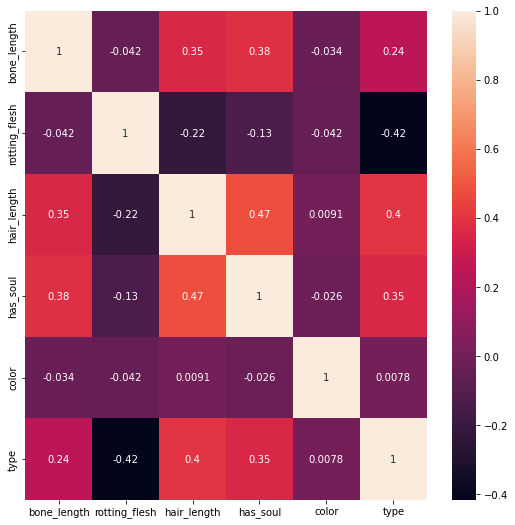

In [6]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(train_df.corr(), annot=True)

#### 독립변수(X)와 종속변수(y-type)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요.
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train_df = train_df.iloc[:,:-1]
y_train_df = train_df.iloc[:,-1]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=12)

#### Gradient Boost를 활용하여 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (random_state=0,n_estimators=50,learning_rate=0.5)


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [11]:
gb_clf = GradientBoostingClassifier(random_state=0, n_estimators=50, learning_rate=0.5)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('Gradient Boost 예측 정확도: {0:.4f}'.format(gb_accuracy))

Gradient Boost 예측 정확도: 0.7067


#### GBM 하이퍼 파라미터 튜닝을 한 후, 최적의 하이퍼 파라미터를 구하고 정확도를 출력하시오. 위의 값과 정확도를 비교하시오. 이때 n_estimators는 50,100,500, learning_rate는 0.005, 0.1, 0.5,1,10 을 변수로 넣으시오.(gridsearchCV이용,cv=2,verbose=1)

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50, 100, 500],
    'learning_rate':[0.005, 0.1, 0.5, 1, 10]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_estimator_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 15 candidates, totalling 30 fits
최적 하이퍼 파라미터:
 GradientBoostingClassifier(learning_rate=0.005, n_estimators=500,
                           random_state=0)
최고 예측 정확도: 0.7095


#### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (n_estimators=400, learning_rate = 0.1, max_depth = 3)

In [13]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [14]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print('XGBoost 예측 정확도: {0:.4f}'.format(xgb_accuracy))

[16:59:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost 예측 정확도: 0.6800


#### 사이킷런 래퍼 클래스 LightGBM를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. 

n_estimators=400
조기 중단 파라미터: early_stopping_rounds=100, eval_metric="logloss",  eval_set=evals 

In [15]:
import lightgbm
from lightgbm import LGBMClassifier

evals = [(X_test, y_test)]
lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals)
lgbm_pred = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('LGBM 예측 정확도: {0:.4f}'.format(lgbm_accuracy))

[1]	valid_0's multi_logloss: 1.04658
[2]	valid_0's multi_logloss: 0.991864
[3]	valid_0's multi_logloss: 0.961098
[4]	valid_0's multi_logloss: 0.922715
[5]	valid_0's multi_logloss: 0.889621
[6]	valid_0's multi_logloss: 0.860335
[7]	valid_0's multi_logloss: 0.838603
[8]	valid_0's multi_logloss: 0.823945
[9]	valid_0's multi_logloss: 0.808374
[10]	valid_0's multi_logloss: 0.794635
[11]	valid_0's multi_logloss: 0.787051
[12]	valid_0's multi_logloss: 0.779236
[13]	valid_0's multi_logloss: 0.772983
[14]	valid_0's multi_logloss: 0.764275
[15]	valid_0's multi_logloss: 0.752906
[16]	valid_0's multi_logloss: 0.746936
[17]	valid_0's multi_logloss: 0.748563
[18]	valid_0's multi_logloss: 0.744367
[19]	valid_0's multi_logloss: 0.743001
[20]	valid_0's multi_logloss: 0.73754
[21]	valid_0's multi_logloss: 0.73435
[22]	valid_0's multi_logloss: 0.730277
[23]	valid_0's multi_logloss: 0.729156
[24]	valid_0's multi_logloss: 0.727211
[25]	valid_0's multi_logloss: 0.73012
[26]	valid_0's multi_logloss: 0.729092

## Stacking 실습

CV set 기반 stacking을 통해 앙상블 모델을 만드려고 합니다.    
개별 모델이 교차검증을 통해 최종 모델이 사용할 학습용, 테스트용 데이터를 만드는 함수를 생성하시오.
```
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    return train_fold_pred , test_pred_mean
```

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error


def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    # 지정된 n_folds 값으로 KFolds 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train.shape[0], 1))
    test_pred = np.zeros((X_test.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ', folder_counter, '시작')
        X_tr = X_train[train_index]
        y_tr = y_train[train_index]
        X_te = X_train[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습도니 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

스태킹에 사용될 개별 모델을 생성하시오.

개별 모델:  KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, AdaBoost(n_estimators=100), LightGBM(n_estimators=400)

최종 모델: 로지스틱 회귀 (C=10)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

lr_final = LogisticRegression(C=10)

위에서 생성한 함수를 사용해 개별 모델을 학습, 예측시켜 메타모델에 사용될 학습용 데이터와 테스트용 데이터를 생성하고, 스태킹하시오.  
fold 수 = 6  
학습용 데이터 : stacked_X_train  
테스트용 데이터 : stacked_X_test

In [52]:
X_train.index.value_counts()

292    1
369    1
2      1
248    1
196    1
      ..
285    1
133    1
247    1
63     1
331    1
Length: 296, dtype: int64

In [53]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 6)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 6)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 6)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 6)

# 똑같은 코드로 예습과제에서는 잘 실행됐는데 여기서는 왜 에러 나는지 전혀 모르겠어요 ㅠㅠ

KNeighborsClassifier  model 시작 
	 폴드 세트:  0 시작


KeyError: "None of [Int64Index([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,\n            ...\n            286, 287, 288, 289, 290, 291, 292, 293, 294, 295],\n           dtype='int64', length=246)] are in the [columns]"

In [ ]:
stacked_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
stacked_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)

최종 모델 (logistic regression)을 학습시키고, 정확도를 구하시오.

In [ ]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

### CatBoost

범주형 변수가 많은 데이터에 catboost를 적용해봅시다.

데이터 출처:
https://www.kaggle.com/datasets/uciml/mushroom-classification


In [24]:
# mushrooms.csv 파일을 사용합니다.

mushroom_df = pd.read_csv('mushrooms.csv')

mushroom_df feature들의 data type을 확인하시오.

In [25]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

feature와 target을 각각 X_mushroom, y_mushroom으로 분리하고,  
train_test_split 함수로 train, test set을 분리하시오. (test size = 0.2)

In [32]:
X_mushroom = mushroom_df.iloc[:,1:]
y_mushroom = mushroom_df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, test_size=0.2)

CatBoostClassifier를 불러오고, Pool 함수를 이용해 범주형 변수를 처리하도록 train_pool, test_pool을 만드시오.

In [33]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [44]:
from catboost import CatBoostClassifier, Pool

cb_clf = CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)

train_pool = Pool(data=X_train, label=y_train, cat_features=np.where(X_train.dtypes != np.float)[0])
test_pool = Pool(data=X_test, label=y_test, cat_features=np.where(X_train.dtypes != np.float)[0])

iteration=400, learning_rate=0.1, max_depth=3로 설정한 CatBoost 모델로 버섯에 대한 정보를 학습하고 테스트 데이터 버섯의 독성 여부를 예측하시오. 또 정확도를 구하시오.  

In [45]:
cb_clf.fit(train_pool)
pred = cb_clf.predict(test_pool)

print('CatBoost 예측 정확도: ', accuracy_score(y_test, pred))

0:	learn: 0.4853803	total: 219ms	remaining: 1m 27s
1:	learn: 0.3491789	total: 264ms	remaining: 52.5s
2:	learn: 0.2620505	total: 303ms	remaining: 40.1s
3:	learn: 0.1965569	total: 354ms	remaining: 35.1s
4:	learn: 0.1209143	total: 392ms	remaining: 31s
5:	learn: 0.0912673	total: 421ms	remaining: 27.7s
6:	learn: 0.0749435	total: 456ms	remaining: 25.6s
7:	learn: 0.0638696	total: 486ms	remaining: 23.8s
8:	learn: 0.0568796	total: 515ms	remaining: 22.4s
9:	learn: 0.0450456	total: 548ms	remaining: 21.4s
10:	learn: 0.0404382	total: 594ms	remaining: 21s
11:	learn: 0.0373565	total: 649ms	remaining: 21s
12:	learn: 0.0306168	total: 695ms	remaining: 20.7s
13:	learn: 0.0275673	total: 757ms	remaining: 20.9s
14:	learn: 0.0243978	total: 795ms	remaining: 20.4s
15:	learn: 0.0229644	total: 825ms	remaining: 19.8s
16:	learn: 0.0207240	total: 864ms	remaining: 19.5s
17:	learn: 0.0193531	total: 934ms	remaining: 19.8s
18:	learn: 0.0178003	total: 967ms	remaining: 19.4s
19:	learn: 0.0173429	total: 996ms	remaining: 1

163:	learn: 0.0028275	total: 7.5s	remaining: 10.8s
164:	learn: 0.0028187	total: 7.55s	remaining: 10.8s
165:	learn: 0.0028187	total: 7.61s	remaining: 10.7s
166:	learn: 0.0027739	total: 7.67s	remaining: 10.7s
167:	learn: 0.0027643	total: 7.73s	remaining: 10.7s
168:	learn: 0.0027643	total: 7.8s	remaining: 10.7s
169:	learn: 0.0027605	total: 7.86s	remaining: 10.6s
170:	learn: 0.0027605	total: 7.91s	remaining: 10.6s
171:	learn: 0.0027605	total: 7.97s	remaining: 10.6s
172:	learn: 0.0027604	total: 8.04s	remaining: 10.6s
173:	learn: 0.0027604	total: 8.11s	remaining: 10.5s
174:	learn: 0.0027604	total: 8.17s	remaining: 10.5s
175:	learn: 0.0027603	total: 8.26s	remaining: 10.5s
176:	learn: 0.0027603	total: 8.32s	remaining: 10.5s
177:	learn: 0.0027603	total: 8.37s	remaining: 10.4s
178:	learn: 0.0027603	total: 8.42s	remaining: 10.4s
179:	learn: 0.0027603	total: 8.47s	remaining: 10.4s
180:	learn: 0.0027545	total: 8.51s	remaining: 10.3s
181:	learn: 0.0027545	total: 8.56s	remaining: 10.3s
182:	learn: 0.

327:	learn: 0.0022030	total: 14.5s	remaining: 3.19s
328:	learn: 0.0022030	total: 14.6s	remaining: 3.15s
329:	learn: 0.0022030	total: 14.6s	remaining: 3.1s
330:	learn: 0.0022030	total: 14.6s	remaining: 3.05s
331:	learn: 0.0022030	total: 14.7s	remaining: 3s
332:	learn: 0.0022030	total: 14.7s	remaining: 2.96s
333:	learn: 0.0022030	total: 14.7s	remaining: 2.91s
334:	learn: 0.0022029	total: 14.7s	remaining: 2.86s
335:	learn: 0.0022029	total: 14.8s	remaining: 2.81s
336:	learn: 0.0022029	total: 14.8s	remaining: 2.77s
337:	learn: 0.0021045	total: 14.8s	remaining: 2.72s
338:	learn: 0.0021045	total: 14.9s	remaining: 2.67s
339:	learn: 0.0021045	total: 14.9s	remaining: 2.63s
340:	learn: 0.0021045	total: 14.9s	remaining: 2.58s
341:	learn: 0.0021045	total: 14.9s	remaining: 2.53s
342:	learn: 0.0021045	total: 15s	remaining: 2.49s
343:	learn: 0.0021045	total: 15s	remaining: 2.44s
344:	learn: 0.0021045	total: 15s	remaining: 2.4s
345:	learn: 0.0021045	total: 15.1s	remaining: 2.35s
346:	learn: 0.0021044	t

수고하셨습니다!